

---


# **SIFT** (Scale Invariant Feature Transform)



---



In [1]:
# to run in google colab
!pip install -U opencv-python --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 11.1 MB/s eta 0:00:00


In [2]:
!wget -q http://zeus.robots.ox.ac.uk/vise/demo/oxford-buildings/image/all_souls_000002.jpg
!wget -q http://zeus.robots.ox.ac.uk/vise/demo/oxford-buildings/image/all_souls_000140.jpg

In [4]:
from random import randrange
import matplotlib.pyplot as plt
import numpy as np
import cv2
figsize = (10, 10)

In [5]:
rgb_l = cv2.cvtColor(cv2.imread("all_souls_000002.jpg"), cv2.COLOR_BGR2RGB)
gray_l = cv2.cvtColor(rgb_l, cv2.COLOR_RGB2GRAY)
rgb_r = cv2.cvtColor(cv2.imread("all_souls_000140.jpg"), cv2.COLOR_BGR2RGB)
gray_r = cv2.cvtColor(rgb_r, cv2.COLOR_RGB2GRAY)

## SIFT feature detection and description


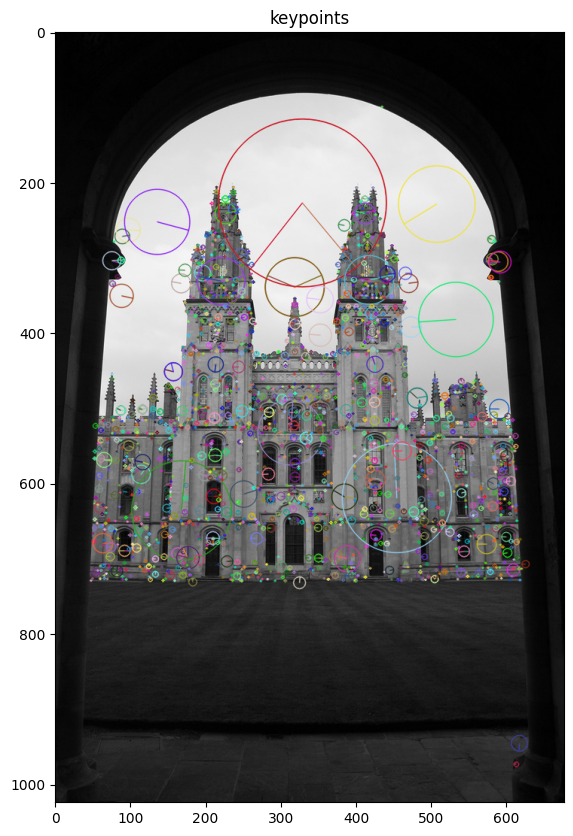

In [ ]:
# Instantiate the SIFT
feature_extractor = cv2.SIFT_create()

# find the keypoints and descriptors with chosen feature_extractor
kp_l, desc_l = feature_extractor.detectAndCompute(gray_l, None)
kp_r, desc_r = feature_extractor.detectAndCompute(gray_r, None)

test = cv2.drawKeypoints(gray_l, kp_l, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=figsize)
plt.imshow(test)
plt.title("keypoints")
plt.show()

## take only unique features


In [ ]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc_l, desc_r, k=2)

# Apply ratio test
good_and_second_good_match_list = []
for m in matches:
    if m[0].distance/m[1].distance < 0.3:
        good_and_second_good_match_list.append(m)
good_match_arr = np.asarray(good_and_second_good_match_list)[:,0]

# show only 30 matches
im_matches = cv2.drawMatchesKnn(gray_l, kp_l, gray_r, kp_r,
                                good_and_second_good_match_list[0:], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 20))
plt.imshow(im_matches)
plt.title("keypoints matches")
plt.show()



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!rm *.2

SIFT code is adapted from:
https://towardsdatascience.com/image-stitching-using-opencv-817779c86a83
